In [1]:
#Import the required packages with their customary aliases
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotly import tools
import plotly.graph_objs as go
import plotly.figure_factory as ff
import seaborn as sns
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
pd.set_option('display.max_columns', 104)
sns.set(color_codes=True)
#Use the %matplotlib inline command so that your plots show in the notebook without having to call plt.show() every time
%matplotlib inline

In [2]:
energy_consumption_yearly = pd.read_csv('data/energy_consumption_combine_df2.csv', index_col=0)

In [3]:
energy_consumption_yearly.year.value_counts()

2012.0    1949
2013.0    1945
2014.0    1944
2015.0    1934
2017.0    1934
2016.0    1932
2019.0    1609
2018.0    1449
Name: year, dtype: int64

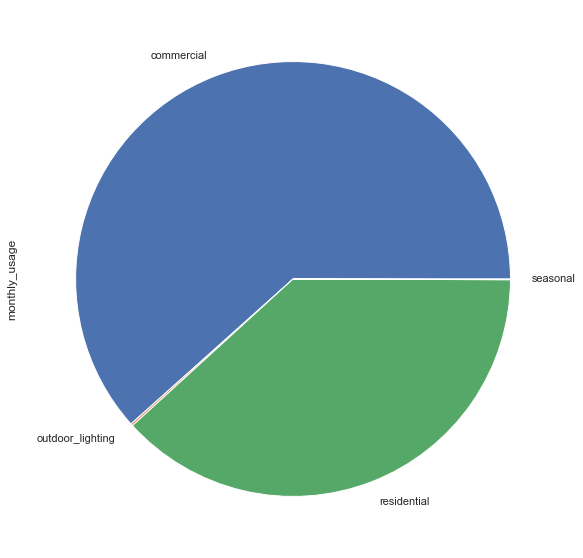

In [4]:
plt.rcParams['figure.figsize'] = (16,10)
energy_consumption_yearly.groupby('customer_type').monthly_usage.mean().plot(kind='pie')

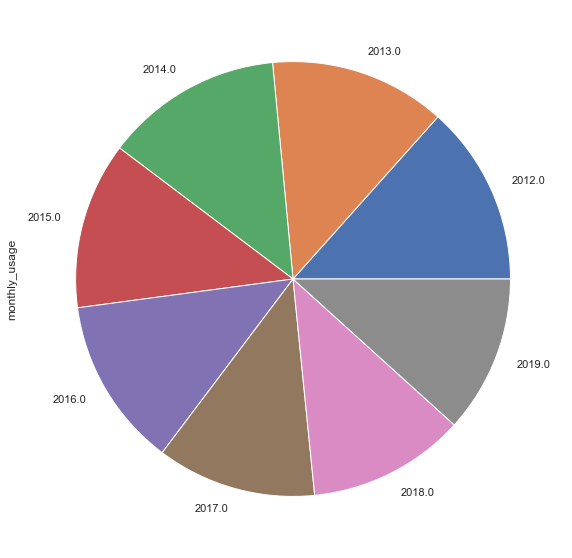

In [29]:
plt.rcParams['figure.figsize'] = (16,10)

energy_consumption_yearly.groupby('year').monthly_usage.mean().plot(kind='pie')


/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning:

invalid value encountered in greater_equal

/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning:

invalid value encountered in less_equal



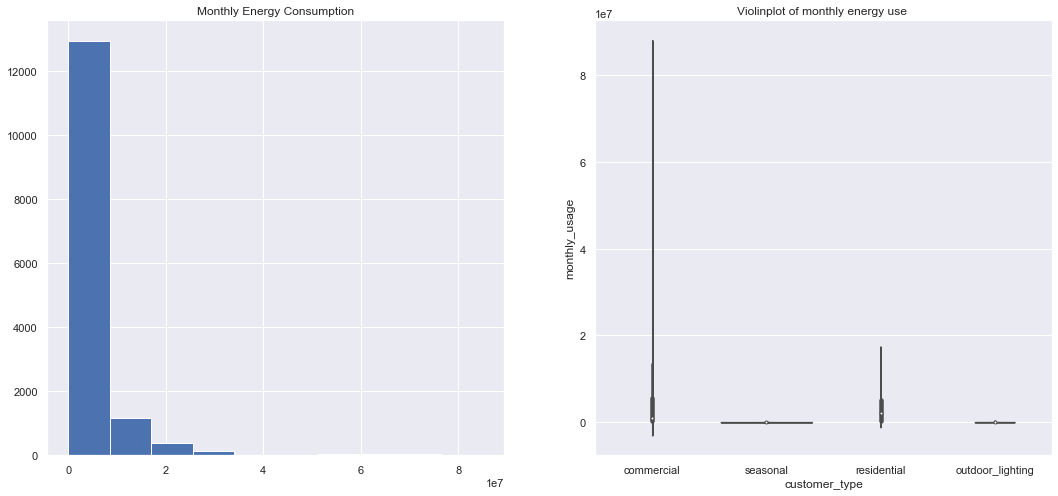

In [5]:
fig, ax = plt.subplots(figsize = (18, 8))
plt.subplot(1, 2, 1);
plt.hist(energy_consumption_yearly['monthly_usage']);
plt.title('Monthly Energy Consumption');
plt.subplot(1, 2, 2);
sns.violinplot(x='customer_type', y='monthly_usage', data=energy_consumption_yearly);
plt.title('Violinplot of monthly energy use ');

Few interesting inferences:

Almost all of monthly use values are close to zero and a few after 2
monthly energy consumption from commercial is exceptionally higher compared to other customer types

In [6]:
def plot_dist(meter, clip_from):
    '''Plots distribution of non zero train data vs meter number''' 
    df = energy_consumption_yearly.query(f'monthly_usage!=0')
    fig, ax = plt.subplots(figsize = (18, 6))
    plt.subplot(1, 3, 1);
    plt.hist(df['monthly_usage']);
    plt.title('Basic meter_reading histogram');
    plt.subplot(1, 3, 2);
    sns.violinplot(x='monthly_usage', y='customer_type', data=df);
    plt.title('Violinplot of monthly energy use');
    plt.subplot(1, 3, 3);
    sns.violinplot(x='monthly_usage', y='customer_type', data=df.query(f'monthly_usage < {clip_from}'));
    plt.title('*Clipped* Violinplot of monthly_usage by customer_type');

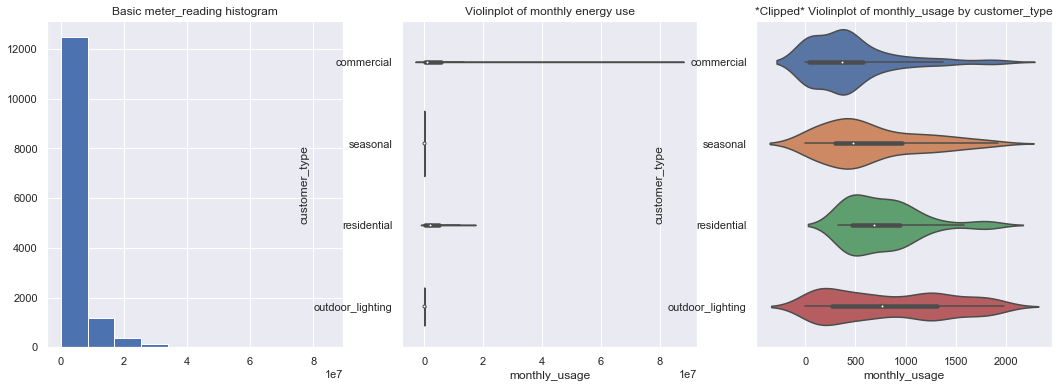

In [7]:
plot_dist(0, 2000)

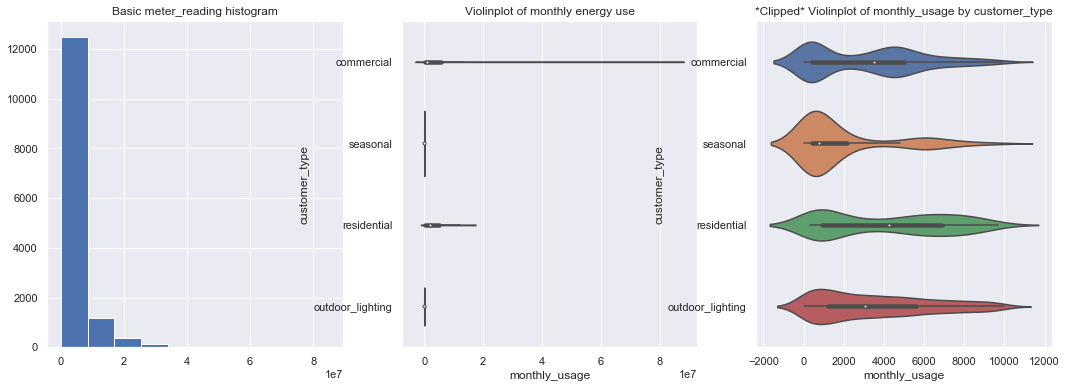

In [8]:
plot_dist(1, 10000)

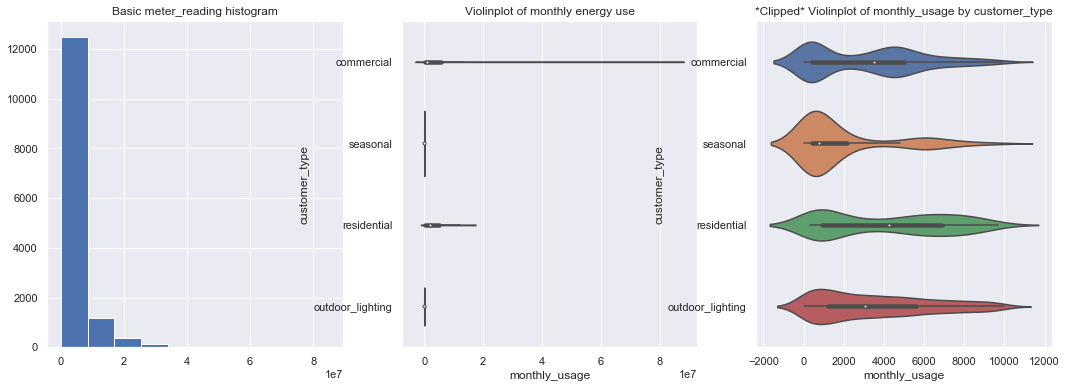

In [9]:
plot_dist(2, 10000)

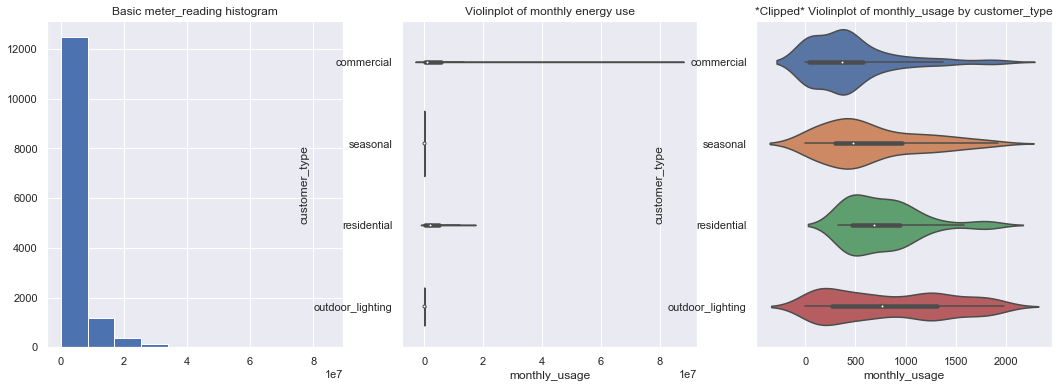

In [10]:
plot_dist(3, 2000)

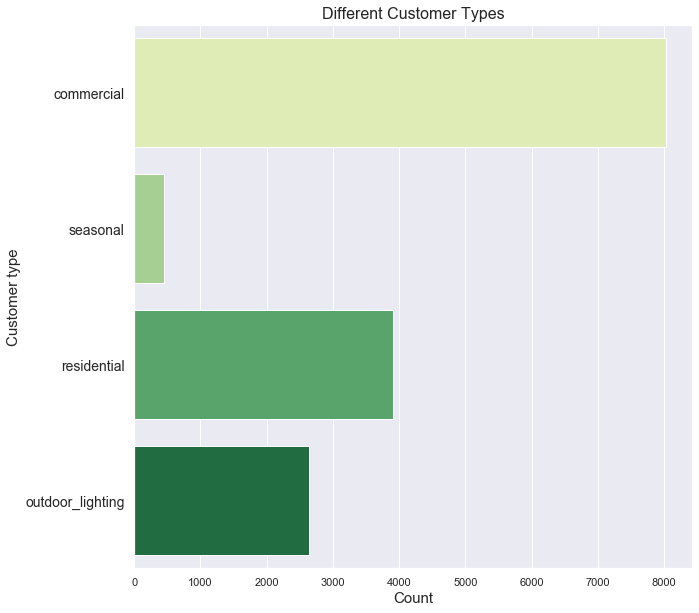

In [11]:
fig, ax = plt.subplots(figsize=(10, 10))
plot = sns.countplot(y="customer_type", data=energy_consumption_yearly, 
                     palette='YlGn').set_title('Different Customer Types', fontsize=16)
plt.yticks(fontsize=14)
plt.xlabel("Count", fontsize=15)
plt.ylabel("Customer type", fontsize=15)
plt.show(plot)

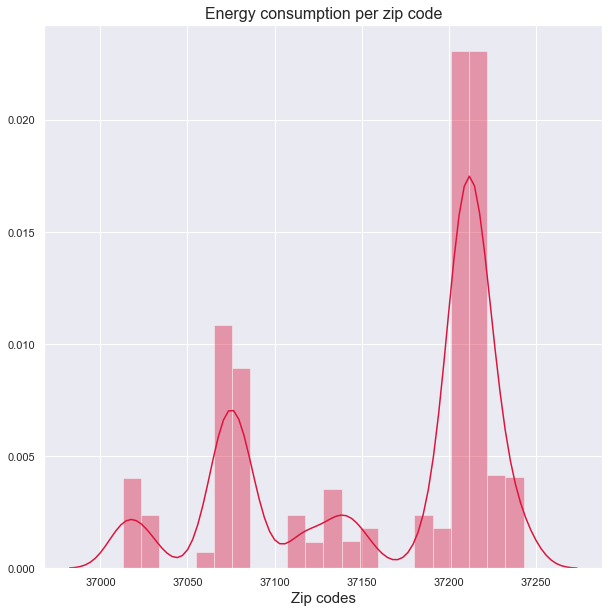

In [12]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.distplot(energy_consumption_yearly['zip_code'].dropna(), color='crimson', 
             ax=ax).set_title('Energy consumption per zip code', fontsize=16)
plt.xlabel('Zip codes', fontsize=15)
plt.show()

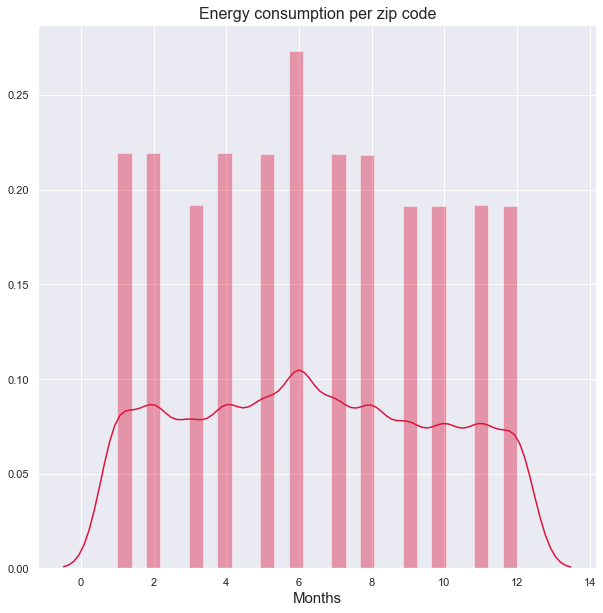

In [13]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.distplot(energy_consumption_yearly['month'].dropna(), color='crimson', 
             ax=ax).set_title('Energy consumption per zip code', fontsize=16)
plt.xlabel('Months', fontsize=15)
plt.show()

fig, ax = plt.subplots(figsize=(10, 10))

sns.distplot(energy_consumption_yearly['customer_type'].dropna(), color='indigo', 
             ax=ax).set_title('Gross floor area of the building', fontsize=16)
plt.xlabel('square_feet', fontsize=15)
plt.show()

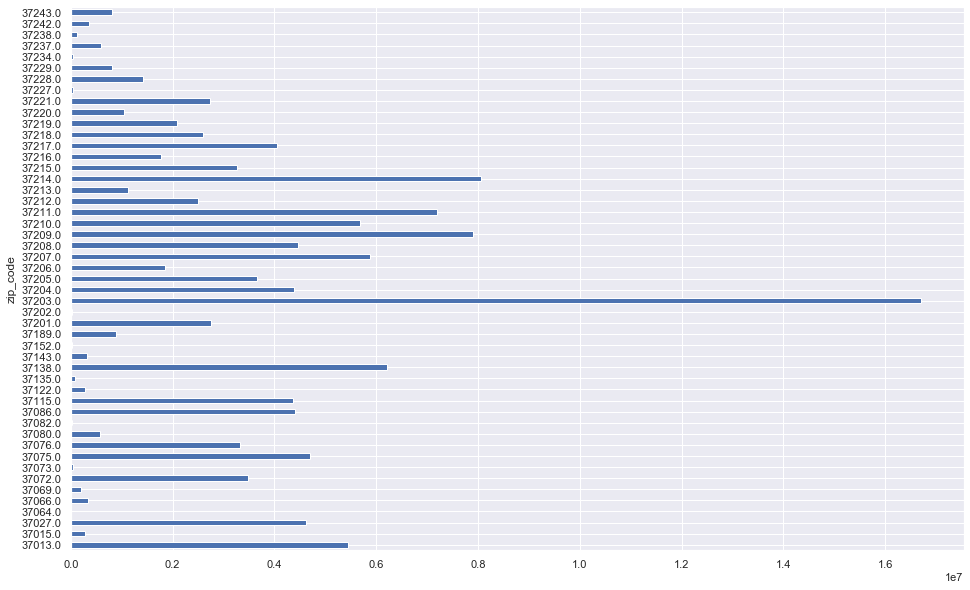

In [15]:
plt.rcParams['figure.figsize'] = (16,12)
energy_consumption_yearly.groupby('zip_code').monthly_usage.mean().plot(kind='barh')

###### 2014 DataFrame

In [16]:
year2014_df = energy_consumption_yearly.loc[energy_consumption_yearly.year == 2014]
year2014_df.head()

,year,month,zip_code,customer_type,monthly_usage,lat,lng,geometry
688,2014.0,9,37082.0,commercial,2307.0,36.088320,-87.117051,POINT (-87.117051 36.08832)
689,2014.0,9,37072.0,commercial,1755306.0,36.350389,-86.731255,POINT (-86.731255 36.350389)
690,2014.0,9,37210.0,commercial,28250238.0,36.140869,-86.738847,POINT (-86.73884700000001 36.140869)
691,2014.0,9,37207.0,commercial,16575065.0,36.224945,-86.775061,POINT (-86.77506099999999 36.224945)
692,2014.0,9,37115.0,commercial,11296003.0,36.262567,-86.704171,POINT (-86.704171 36.262567)


In [19]:
commercial2014_df = year2014_df.loc[year2014_df.customer_type == 'commercial']
commercial2014_df.head()

,year,month,zip_code,customer_type,monthly_usage,lat,lng,geometry
688,2014.0,9,37082.0,commercial,2307.0,36.088320,-87.117051,POINT (-87.117051 36.08832)
689,2014.0,9,37072.0,commercial,1755306.0,36.350389,-86.731255,POINT (-86.731255 36.350389)
690,2014.0,9,37210.0,commercial,28250238.0,36.140869,-86.738847,POINT (-86.73884700000001 36.140869)
691,2014.0,9,37207.0,commercial,16575065.0,36.224945,-86.775061,POINT (-86.77506099999999 36.224945)
692,2014.0,9,37115.0,commercial,11296003.0,36.262567,-86.704171,POINT (-86.704171 36.262567)


In [20]:
commercial2014_df['monthly_usage'] = commercial2014_df['monthly_usage']. 
commercial2014_df.describe()

SyntaxError: invalid syntax (<ipython-input-20-8dffe4f28542>, line 1)

In [ ]:
year2014_df.groupby('customer_type').monthly_usage.mean()

In [ ]:
sns.barplot(x='Month',y='amount',data = Year_2013)
plt.title('Year 2013')

###### 2015 DataFrame

In [ ]:
year2015_df = energy_consumption_yearly.loc[energy_consumption_yearly.year == 2015]
year2015_df.head()


In [ ]:
year2015_df.groupby('customer_type').monthly_usage.mean()

###### 2016 DataFrame

In [ ]:
year2016_df = energy_consumption_yearly.loc[energy_consumption_yearly.year == 2016]
year2016_df.head()

###### 2017 DataFrame

In [ ]:
year2017_df = energy_consumption_yearly.loc[energy_consumption_yearly.year == 2017]
year2017_df.head()

In [ ]:
year2017_df.groupby('customer_type').monthly_usage.agg(['count', 'min', 'max', 'mean', 'sum'])

In [ ]:
year2017_df.groupby('customer_type').monthly_usage.mean().plot(kind='bar')

###### 2018 DataFrame

In [ ]:
year2018_df = energy_consumption_yearly.loc[energy_consumption_yearly.year == 2018]
year2018_df.head()

###### 2019 DataFrame

In [ ]:
year2019_df = energy_consumption_yearly.loc[energy_consumption_yearly.year == 2019]
year2019_df.head()

In [ ]:
plt.rcParams['figure.figsize'] = (16,10)
year2019_df.groupby('customer_type').monthly_usage.plot(kind='barh')